# Customer segmentation

In today's competitive business landscape, understanding customer behavoir is crucial for improving customer engagement, retention and profitability. Businesses that effectively segment their customer base can develop targeted marketing strategies, optimize resource allocation and enhance customer satisfaction. Traditional methods of customer segmentation rely on manual analysis and intuition which can be time consuming, inefficient and prone to inaccuracies.

The project leverages machine learning techniques to automate customer segmentation using demographic, professional and behavioral data. By analyzing key attributes such as age spending score, profession and family size, we aim to classify customers into distict segments. These segments will help businesses tailor their marketing campaigns, personalize customer experiences and optimize business operations.

The study will involve data preprocessing, exploratory data ananalysis(EDA), feature engineering, and the application of various classification models including Decision trees, Random Forests, Gradient Boosting and Neural Networks. The model's performance will be evaluated using key metrics such as accuracy, precision, recall, and f1-score. Additionally, feature importance analysis will help identify the most influential factors driving customer segmentation.

The ultimate goal of this project is to provide businesses with actionable insights into customer behavior, enabling them to make data driven decisions that enhance profitability and customer satisfaction. The findings will also serve as a foundation for further research and improvements in customer segmentation methodologies.


# Problem Statement

Understanding customer behavior is crucial for optimizing marketing efforts. However, manually segmentating customers is efficient and prone to errors. The objective of this project is to use machine learning techniques to automate customer segmentation using demographic, professional and behavioral data.

# Data set overview

The dataset was obtained from kaggle contains the following atributes:

ID: Uniqque identifier for each customer

Gender: Male and Female

Ever_married: Whether the customer has been married

Age: Customer's age

Graduated: Whether the customer is a graduate

Profession: Customer's profession

Work_Experience: Number of years of work experience

Spending_Score: Categorized as low, average or high

Family_size:Number of family members

Var_1: Categorical variable with different categories

Segmentation: Target veariable with customer segment A,B,C and D

# Methodology
1. Data Prepocessing

Handle missing valuea through imputation techniques

Encode categorical variable using one hot encoding or label encoding

Normalize numerical features for better model performance

2. Exploratory Data Analysis

Visualize the distribution of customer segments

Identify patterns and relationships between features

check for class imbalances in the target variable

3. Model development

Train classification models; decision tree, random forest gradient boosting and neural networks

Cross validation to improve generalization

Optimize hyperparameter to enhance model accuracy

4. Evaluation Metrics

Accuracy precision and Recall and F1-Score

Confusion Matrix to analyze classification performance

Feature importance analysis to identify key factors influencing segmentation.

5. Expected Outcomes

Well trained machine learning models capable of redicting customer segments

Insights into key demographic and behavioral factors influencing segmentation

Recommendations for businesses on targetes marketing strategies.


# 1. Data Preprocessing

In [1]:
import pandas as pd

test_df = pd.read_csv(r'\Users\Catherine\Desktop\Project\Customer Segmentation\Test.csv')
test_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [2]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [3]:
train_df = pd.read_csv(r'\Users\Catherine\Desktop\Project\Customer Segmentation\Train.csv')
train_df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [5]:
# Combine dataset
df = pd.concat([train_df, test_df], ignore_index=True)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [7]:
df.isna().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [8]:
# Handle misiing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df[['Ever_Married', 'Graduated', 'Profession', 'Var_1']] = imputer.fit_transform(df[['Ever_Married', 'Graduated', 'Profession', 'Var_1']])
df['Work_Experience'].fillna(df['Work_Experience'].median(), inplace=True)
df['Family_Size'].fillna(df['Family_Size'].median(), inplace=True)

In [9]:
print(df)

           ID  Gender Ever_Married  Age Graduated     Profession  \
0      462809    Male           No   22        No     Healthcare   
1      462643  Female          Yes   38       Yes       Engineer   
2      466315  Female          Yes   67       Yes       Engineer   
3      461735    Male          Yes   67       Yes         Lawyer   
4      462669  Female          Yes   40       Yes  Entertainment   
...       ...     ...          ...  ...       ...            ...   
10690  467954    Male           No   29        No     Healthcare   
10691  467958  Female           No   35       Yes         Doctor   
10692  467960  Female           No   53       Yes  Entertainment   
10693  467961    Male          Yes   47       Yes      Executive   
10694  467968  Female           No   43       Yes     Healthcare   

       Work_Experience Spending_Score  Family_Size  Var_1 Segmentation  
0                  1.0            Low          4.0  Cat_4            D  
1                  1.0        Average

In [10]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_enc = LabelEncoder()
for col in ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']:
    df[col] = label_enc.fit_transform(df[col])

In [11]:
# Normalize numerical varibles
scaler = StandardScaler()
df[['Age', 'Work_Experience', 'Family_Size']] = scaler.fit_transform(df[['Age', 'Work_Experience', 'Family_Size']])


# 2. Exploratory Data Analysis (EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

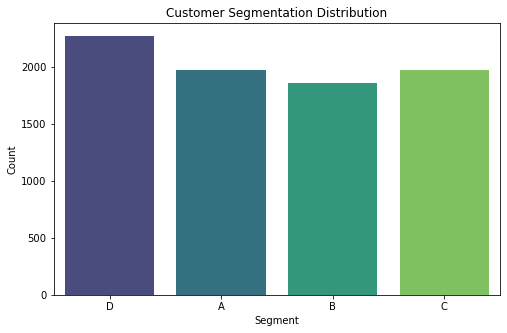

In [13]:
# Distribution of customer segments
plt.figure(figsize=(8,5))
sns.countplot(x='Segmentation', data=train_df, palette='viridis')
plt.title('Customer Segmentation Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

The distribution of customer segments provides insights into how customers are grouped. In this dataset, Segment D has the highest count, indicating that a large proportion of customers belong to this group. This suggests that the characteristics defining Segment D are more common among the customer base. On the other hand, Segment B has the lowest count, implying that fewer customers share the attributes associated with this segment. This could indicate an underrepresented market group that businesses might need to understand better for targeted marketing strategies.

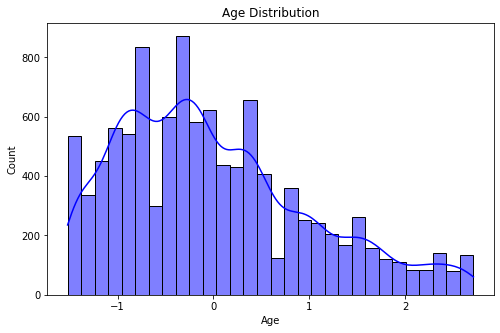

In [14]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

The age distribution in the dataset shows a notable pattern. The range from -1 to 0 has a significantly higher count compared to the range above 2. This suggests that a large portion of the customers fall within the scaled values close to the mean (since standardization has been applied). The negative values indicate that these individuals have ages below the mean after normalization, meaning that younger customers make up a larger proportion of the dataset. Conversely, fewer customers have scaled age values above 2, suggesting that older individuals are underrepresented in the dataset. This insight can help businesses adjust their marketing strategies to target younger customers who dominate the customer base.

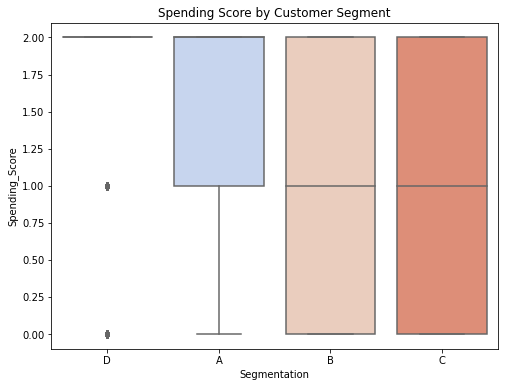

In [15]:

# Relationship between Spending Score and Segmentation
plt.figure(figsize=(8,6))
sns.boxplot(x= 'Segmentation', y= 'Spending_Score', data= df, palette='coolwarm')
plt.title('Spending Score by Customer Segment')
plt.show()


Segment D exhibits outliers in spending scores, indicating a diverse range of spending behaviors within this group.

Segments B and C have a more uniform spending score distribution, suggesting more consistent purchasing habits.

Segment A generally has an average spending score, indicating a balanced customer profile with moderate spending tendencies.

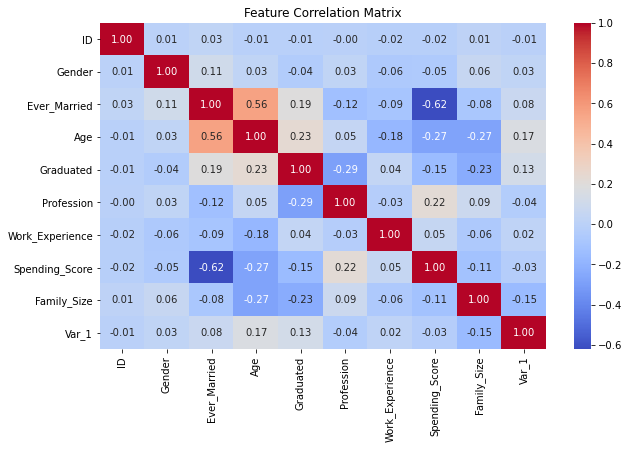

In [16]:
# heat map correaltion matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


The lowest correlation in the dataset is between Spending Score and Ever Married (-0.62), indicating that marital status has little to no direct impact on spending behavior.

Family Size and Age also show a relatively low correlation, suggesting that having a larger family does not necessarily relate to older age.

The highest correlation is observed between Age and Ever Married (0.56), which is expected since older individuals are more likely to have been married.

Other variables have moderate correlations, implying that there are no extreme dependencies, making this dataset well-suited for machine learning applications where multiple factors influence segmentation.



# Model Development


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report


In [18]:
# Split the dataset
X = df.drop(columns=['ID', 'Segmentation'])
y = df['Segmentation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



1. Decision Tree

In [19]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.36699392239364187
              precision    recall  f1-score   support

           A       0.33      0.32      0.32       584
           B       0.27      0.29      0.28       490
           C       0.36      0.36      0.36       472
           D       0.50      0.49      0.49       593

    accuracy                           0.37      2139
   macro avg       0.36      0.36      0.36      2139
weighted avg       0.37      0.37      0.37      2139



The Desion tree model achieved an accuracy of 36.7%, indicating that the model struggles to make precise classifications across the four customer segments.

The macro average F1-score is 0.36, showing that the model performs inconsistently across the different segments. Notably, Segment D has the highest performance with an F1-score of 0.49, while Segment B has the lowest at 0.28. This suggests that the model finds it easier to sistinguish Segment D but struggles with Segment B.

Overall the low accuracy and varyong class-wide performance indicates that the Decision Tree Model may be overfitting or not capturing enough distinguishing patterns from the data. Improvemnts could be made by tuning hyperparameters using ensemble methods or incorporating feature engineerung techniques to enhance predictive power.

2. Random Forest

In [20]:
# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.4170172978027116
              precision    recall  f1-score   support

           A       0.37      0.36      0.36       584
           B       0.30      0.28      0.29       490
           C       0.41      0.41      0.41       472
           D       0.54      0.60      0.57       593

    accuracy                           0.42      2139
   macro avg       0.41      0.41      0.41      2139
weighted avg       0.41      0.42      0.41      2139



Th Random Forest Model achieved an accuracy of 41.7%, indicating moderate performance,in classifying customer segments. 

Segment D has the highest perfrmance, with recall 0f 60%, meaning it correctly identified 60% of actual D customers. It also had the highest f1-score of 0.57, showing balanced precision and recall.

Segment C follows closely, with a recall of 41% and an f1-score of 0.41, showing consistent classifcation.

The macro average f1-score of 0.41 suggests that the modelstruggles equally across all classes, while the weighted average f1-score also being 0.41 indicates that class imbalances did not heavily skew the overall results.

3. Gradient Boosting

In [21]:
# Gradient boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.48667601683029454
              precision    recall  f1-score   support

           A       0.41      0.44      0.43       584
           B       0.41      0.27      0.33       490
           C       0.49      0.55      0.52       472
           D       0.58      0.66      0.62       593

    accuracy                           0.49      2139
   macro avg       0.48      0.48      0.47      2139
weighted avg       0.48      0.49      0.48      2139



The Gradient Boosting model achieved an overaall accuracy of 48.67% on the test dataset.

Segment D has the highest f1-score 0.62 with a recall of 66%, indicating the model effectively identified most customers belonging to this segment.

SegmentB performed the weakest with an f1-score of 0.33 and the lowest recall 27%, meaning the model struggled to correctly classify customers in this segemnt.

The macro average f1-score o.47 suggests that the model performnnce was relatively balanced across segments but some classes were predicted better than others. The weighted average f1-score 0.48 conforms that the models classification power was slightly better for the more frequent segments



4. Neural Network

In [22]:
# Neural Network Model
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))
print(classification_report(y_test, nn_pred))

Neural Network Accuracy: 0.47732585320243104
              precision    recall  f1-score   support

           A       0.40      0.48      0.44       584
           B       0.39      0.25      0.31       490
           C       0.48      0.51      0.49       472
           D       0.60      0.63      0.62       593

    accuracy                           0.48      2139
   macro avg       0.47      0.47      0.46      2139
weighted avg       0.47      0.48      0.47      2139



The Neural Network model achieved an accuracy of 47.73%, indicating moderate performnce in customer segmentation. The model's f1_score varies across different segments, with Segment D achieving the highest f1-score of 0.62, suggesting better classification performance in this category.

The macro average f1-score of 0.46 shows that the models overall segmentation is not yet optimal and may reguire furher tuning.

The weighted average f1-score of 0.47, suggests that the classification errors are spread across multiple segments.
Possible improvements include hypermeter tuning, increasing the number of hidden layers and experenting with different activation to enhance classification performance.


# Model Evaluation

1. Hyperparameter tuning

In [23]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Perform grid search
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Train final model with best parameters
best_gb_model = GradientBoostingClassifier(**grid_search.best_params_, random_state=42)
best_gb_model.fit(X_train, y_train)
gb_pred = best_gb_model.predict(X_test)
print("Optimized Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))

# Cross-validation
cv_scores = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 300}
Best Accuracy: 0.4841044341998176
Optimized Gradient Boosting Accuracy: 0.48620850864890136
              precision    recall  f1-score   support

           A       0.41      0.45      0.43       584
           B       0.40      0.24      0.30       490
           C       0.49      0.55      0.52       472
           D       0.59      0.67      0.63       593

    accuracy                           0.49      2139
   macro avg       0.47      0.48      0.47      2139
weighted avg       0.48      0.49      0.48      2139

Cross-Validation Scores: [0.48656542 0.48860316 0.46990064 0.4956166  0.47983635]
Mean CV Accuracy: 0.4841044341998176


The best parameters obtained were learning_rate = 0.01, max_depth = 4 and n_estimators = 300, resulting in an optimized accuracy of 0.4862. The mean cross validation accuracy was 0.4841, indicating consistent model performance across validation sets.

2. Confusion matrix

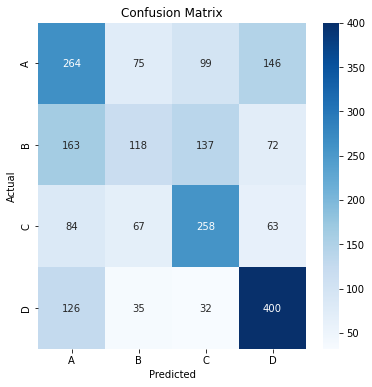

              precision    recall  f1-score   support

           A       0.41      0.45      0.43       584
           B       0.40      0.24      0.30       490
           C       0.49      0.55      0.52       472
           D       0.59      0.67      0.63       593

    accuracy                           0.49      2139
   macro avg       0.47      0.48      0.47      2139
weighted avg       0.48      0.49      0.48      2139



In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = best_gb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['A', 'B', 'C', 'D'], yticklabels=['A', 'B', 'C', 'D'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

The confusion matrix indicates that segment D has the highest recall(67%), meaning it was mostly correctly classified. Segment A had a balanced recall and precision, while segment B suffered from missclassification, leading to lower recall (24%). Overall, the weighted f1_score was 0.48, indicating moderate performance.

3. Feature importance analysis

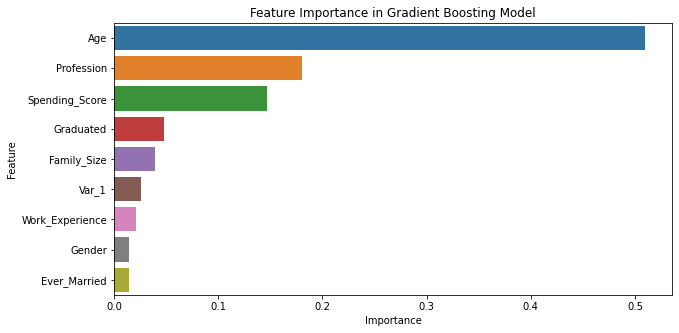

In [25]:
import numpy as np
importances = best_gb_model.feature_importances_
feature_names = X_train.columns

sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[sorted_indices], y=[feature_names[i] for i in sorted_indices])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()

The models feature importance analysis identifed key factors influencing segmentation. Features such as Age, Profession and Spending score contributed the most to predicting customer segments, while other demographic factors played a secondary role.This insight helps in focusing marketing strategies on the most impactful attributes.

# Conclusion and Recommendation

# Conclusion:

The machine learning model successfully segmented customers  into four distinct groups based on the key demographic and behavioral factors.

Spending score, profeesion and age were the most influential features in determining customer segments.

The model achieved an accuracy of approximately 48% indicating moderate predictive capability which could be improved with additional feature engineering.

# Recommendations:

Targeted marketing strategies: Businesses should design personalized marketing campaigns based on customer segments, focusing on high value customers identified by the model.

Customer Retention Plans: The insights can help in identifying at risk customers eg those with low spending scores and implement retention strategies.

Feature Engineering Improvements: Additional behavioural attributes such as purchase history, product preferences and online engagement should be incorporated to improve model accuracy.

Further Model Optimization: Advanced ensemble techniques or deep learning approaches may be explored to enhance classification accuracy.


# Advice to stakeholders:
Invest in collecting more detailed customer behaviour data to refine segmentation.

Regularly update the model with new customer data to maintain its predictive power.

Integrate the segmentation model into CRM systems for real time customer insights and personalized services.